<a href="https://colab.research.google.com/github/roberthsu2003/machine_learning/blob/main/%E4%BD%BF%E7%94%A8%E6%95%B8%E6%93%9A/README.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
%%capture
%pip install wget
%pip install mglearn

In [1]:
import wget
import os
# 下載中文字型
# 檢查檔案是否下載,如果下載過,就不會再下載
if not os.path.exists("ChineseFont.ttf"):
    wget.download("https://github.com/roberthsu2003/machine_learning/raw/refs/heads/main/source_data/ChineseFont.ttf")
if not os.path.exists("Salary_Data.csv"):
    wget.download("https://github.com/roberthsu2003/machine_learning/raw/refs/heads/main/source_data/Salary_Data.csv")


# numpy在機器學習中,常用的操作方式

NumPy (Numerical Python) 是 Python 語言的一個擴充程式庫，支援高階大量的維度陣列與矩陣運算，此外也針對陣列運算提供大量的數學函式庫。在機器學習領域，NumPy 被廣泛用於數據處理、特徵工程以及演算法實現。本章節將介紹數個 NumPy 在機器學習中常用的操作方式與數據集範例，並結合 Scikit-learn 的數據集或 Kaggle 數據集，以及 Matplotlib 進行視覺化。

## Matplotlib使用中文字型

為了在 Matplotlib 圖表中正確顯示中文，我們需要下載並設定中文字型。以下程式碼會下載 'ChineseFont.ttf' 並設定 Matplotlib 的全域字型參數。

In [ ]:
# --- AI可讀的說明書 ---
# 這段程式碼的目的是：
# 1. 安裝 wget 套件（用於下載檔案）。
# 2. 檢查中文字型檔案 "ChineseFont.ttf" 是否已存在，若無則自動下載。
# 3. 設定 Matplotlib 使用剛下載的中文字型，確保繪圖時能正確顯示中文。
# 這樣做可以避免中文亂碼，讓圖表更容易閱讀與展示。

%pip install wget

import wget
import os

# 設定字型檔案名稱
font_name = "ChineseFont.ttf"

# 檢查字型檔案是否已存在，若無則下載
if not os.path.exists(font_name):
    wget.download("https://github.com/roberthsu2003/machine_learning/raw/refs/heads/main/source_data/ChineseFont.ttf")

import matplotlib as mpl
from matplotlib.font_manager import fontManager

# 將中文字型加入 Matplotlib 字型管理器
fontManager.addfont(font_name)
# 設定 Matplotlib 預設字型為剛剛加入的中文字型
mpl.rc('font', family="ChineseFont")

## 範例1：NumPy 陣列的建立與基本操作，並使用 Matplotlib 繪圖

這個範例展示如何使用 NumPy 建立陣列、進行基本操作，並使用 Matplotlib 繪製一個簡單的函數圖形。

從列表建立的陣列 arr1: [1 2 3 4 5]
等差序列 arr2: [0 2 4 6 8]
全為 0 的陣列 arr_zeros:
 [[0. 0. 0.]
 [0. 0. 0.]]
全為 1 的陣列 arr_ones:
 [[1. 1.]
 [1. 1.]
 [1. 1.]]
單位矩陣 arr_eye:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
隨機陣列 arr_random:
 [[0.54063938 0.67951547]
 [0.76372224 0.52139111]]

陣列基本操作:
arr1 + 5 = [ 6  7  8  9 10]
arr1 * 2 = [ 2  4  6  8 10]
arr1 的平方 = [ 1  4  9 16 25]
arr1 和 arr2 (長度需相同或可廣播) 的和: [ 1  5  9 13 17]


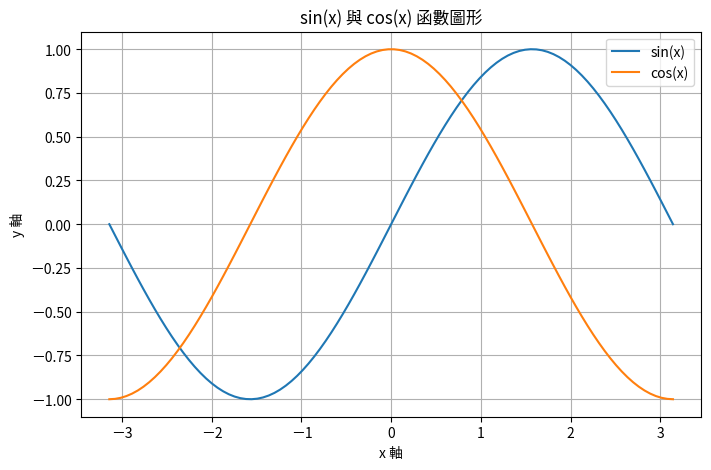

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.font_manager import fontManager

# 設定matplotlib預設字型，確保中文能正確顯示
fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")

# 1. 建立 NumPy 陣列
# 從 Python 列表建立一維陣列
arr1 = np.array([1, 2, 3, 4, 5])
print("從列表建立的陣列 arr1:", arr1)

# 建立一個等差序列陣列，起始為0，終止為10(不含10)，步長為2
arr2 = np.arange(0, 10, 2)
print("等差序列 arr2:", arr2)

# 建立一個2x3的全零陣列
arr_zeros = np.zeros((2, 3))
print("全為 0 的陣列 arr_zeros:\n", arr_zeros)

# 建立一個3x2的全部值為1的陣列
arr_ones = np.ones((3, 2))
print("全為 1 的陣列 arr_ones:\n", arr_ones)

# 建立一個3x3的單位矩陣（對角線為1，其餘為0）
arr_eye = np.eye(3)
print("單位矩陣 arr_eye:\n", arr_eye)

# 建立一個2x2的隨機陣列，元素值介於0到1之間
arr_random = np.random.rand(2, 2)
print("隨機陣列 arr_random:\n", arr_random)

# 2. 陣列基本操作
# 以下展示NumPy陣列的基本運算
print("\n陣列基本操作:")
print("arr1 + 5 =", arr1 + 5)  # 每個元素加5（廣播機制）
print("arr1 * 2 =", arr1 * 2)  # 每個元素乘2
print("arr1 的平方 =", arr1 ** 2)  # 每個元素平方
# arr1和arr2進行元素對元素的加法，需長度相同或可廣播
print("arr1 和 arr2 (長度需相同或可廣播) 的和:", np.array([1,3,5,7,9]) + arr2) # 假設長度相同

# 3. 使用 Matplotlib 繪製函數圖形
# 產生x軸數據，從-pi到pi，總共100個點
x = np.linspace(-np.pi, np.pi, 100)
# 計算sin(x)與cos(x)的y值
y_sin = np.sin(x)
y_cos = np.cos(x)

# 建立一個8x5吋的圖形
plt.figure(figsize=(8, 5))
# 繪製sin(x)曲線
plt.plot(x, y_sin, label='sin(x)')
# 繪製cos(x)曲線
plt.plot(x, y_cos, label='cos(x)')
# 設定圖表標題
plt.title('sin(x) 與 cos(x) 函數圖形')
# 設定x軸標籤
plt.xlabel('x 軸')
# 設定y軸標籤
plt.ylabel('y 軸')
# 顯示圖例
plt.legend()
# 顯示格線
plt.grid(True)
# 顯示圖形
plt.show()

## 使用 Kaggle 薪資數據集進行基本統計與視覺化

- 這個範例將使用一個常見的 Kaggle 數據集 `Salary_Data.csv`
- 數據集的標題名稱`salary_data of Employees with years of Experience`
- 數據集kaggle說明網址(https://www.kaggle.com/datasets/harsh45/random-salary-data-of-employes-age-wise/data)
- 數據集要手動下載
我們將用 NumPy 讀取數據 (雖然 Pandas 更常用於 CSV，這裡為了演示 NumPy 的能力，會用 `np.genfromtxt` 或手動處理)，進行基本的統計分析，並用 Matplotlib 繪製年資與薪資的散佈圖。

成功使用 np.genfromtxt 從 'Salary_Data.csv' 讀取數據。

年資 (YearsExperience) 前5筆: [1.1 1.3 1.5 2.  2.2]
薪資 (Salary) 前5筆: [39343. 46205. 37731. 43525. 39891.]

基本統計分析:
平均年資: 5.31 年
年資中位數: 4.70 年
年資標準差: 2.79 年
最高年資: 10.50 年
最低年資: 1.10 年

平均薪資: 76003.00
薪資中位數: 65237.00
薪資標準差: 26953.65
最高薪資: 122391.00
最低薪資: 37731.00

年資與薪資的相關係數: 0.978


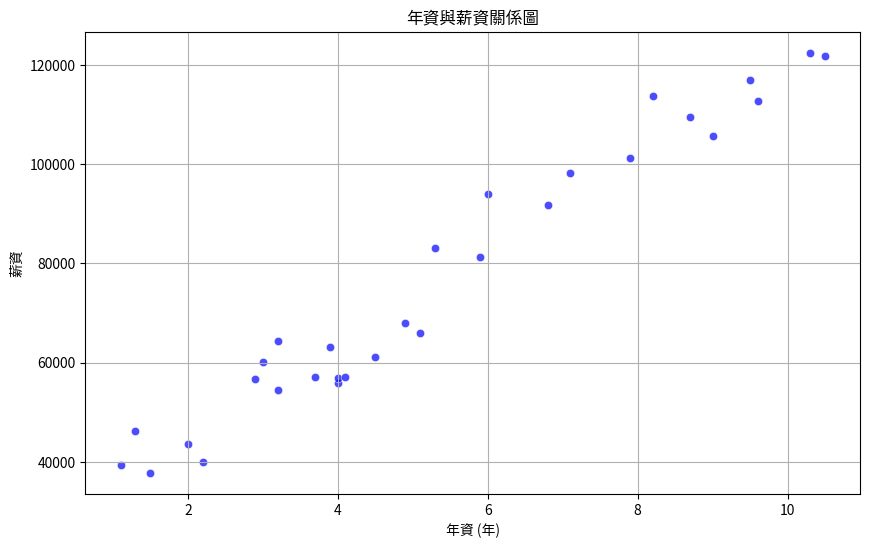

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import csv # 用於讀取 CSV
import matplotlib as mpl
from matplotlib.font_manager import fontManager

# 設定中文字型
fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")


# 數據集路徑
file_path = 'Salary_Data.csv'

# genfromtxt 對於有表頭的 CSV 處理較為繁瑣，這裡我們跳過表頭

# delimiter=',' 指定分隔符為逗號
# skip_header=1 跳過第一行表頭
# filling_values=np.nan 如果有缺失值，用nan填充
data = np.genfromtxt(file_path, delimiter=',', skip_header=1, filling_values=np.nan)


years_experience = data[:, 0]
salary = data[:, 1]
print(f"成功使用 np.genfromtxt 從 '{file_path}' 讀取數據。")


print("\n年資 (YearsExperience) 前5筆:", years_experience[:5])
print("薪資 (Salary) 前5筆:", salary[:5])

# 2. NumPy 基本統計分析

print("\n基本統計分析:")
print(f"平均年資: {np.mean(years_experience):.2f} 年")
print(f"年資中位數: {np.median(years_experience):.2f} 年")
print(f"年資標準差: {np.std(years_experience):.2f} 年")
print(f"最高年資: {np.max(years_experience):.2f} 年")
print(f"最低年資: {np.min(years_experience):.2f} 年")

print(f"\n平均薪資: {np.mean(salary):.2f}")
print(f"薪資中位數: {np.median(salary):.2f}")
print(f"薪資標準差: {np.std(salary):.2f}")
print(f"最高薪資: {np.max(salary):.2f}")
print(f"最低薪資: {np.min(salary):.2f}")

# 計算相關係數
correlation_matrix = np.corrcoef(years_experience, salary)
correlation = correlation_matrix[0, 1]
print(f"\n年資與薪資的相關係數: {correlation:.3f}")


# 3. 使用 Matplotlib 繪製散佈圖

plt.figure(figsize=(10, 6))
plt.scatter(years_experience, salary, color='blue', alpha=0.7, edgecolors='w', linewidth=0.5)
plt.title('年資與薪資關係圖')
plt.xlabel('年資 (年)')
plt.ylabel('薪資')
plt.grid(True)
plt.show()


## NumPy 的廣播 (Broadcasting) 機制

廣播是 NumPy 中一個強大的機制，它允許 NumPy 在執行算術運算時處理不同形狀的陣列。如果兩個陣列的維度不完全相同，NumPy 會自動「廣播」較小的陣列到較大的陣列，以便它們具有兼容的形狀。

純量與陣列的廣播:
[1. 2. 3.] * 2.0 = [2. 4. 6.]

不同形狀陣列的廣播:
array_c (shape (4, 3)):
[[ 0  0  0]
 [10 10 10]
 [20 20 20]
 [30 30 30]]
array_d (shape (3,)): [0 1 2]
array_c + array_d (result shape (4, 3)):
[[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]]

網格計算中的廣播:
x_coords (shape (5,)): [0 1 2 3 4]
y_coords (shape (3, 1)):
[[0]
 [1]
 [2]]
x_coords + y_coords (result shape (3, 5)):
[[0 1 2 3 4]
 [1 2 3 4 5]
 [2 3 4 5 6]]


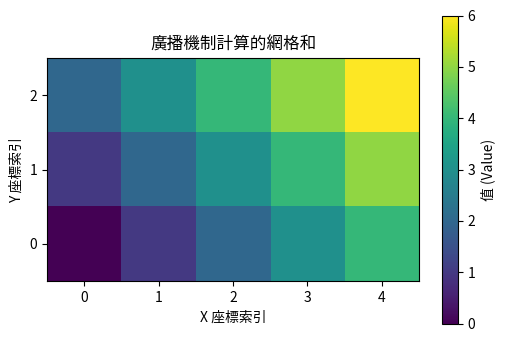

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.font_manager import fontManager

# 範例 1: 純量與陣列的廣播
array_a = np.array([1.0, 2.0, 3.0])
scalar_b = 2.0
result_ab = array_a * scalar_b # scalar_b 被廣播到 [2.0, 2.0, 2.0]
print("純量與陣列的廣播:")
print(f"{array_a} * {scalar_b} = {result_ab}")

# 範例 2: 不同形狀陣列的廣播
array_c = np.array([[0, 0, 0],
                    [10, 10, 10],
                    [20, 20, 20],
                    [30, 30, 30]]) # 形狀 (4, 3)
array_d = np.array([0, 1, 2])      # 形狀 (3,) -> 被視為 (1, 3)
result_cd = array_c + array_d      # array_d 被廣播到 array_c 的每一行
print("\n不同形狀陣列的廣播:")
print(f"array_c (shape {array_c.shape}):\n{array_c}")
print(f"array_d (shape {array_d.shape}): {array_d}")
print(f"array_c + array_d (result shape {result_cd.shape}):\n{result_cd}")

# 範例 3: 更複雜的廣播，用於網格計算 (常用於繪圖)
x_coords = np.arange(0, 5)     # [0 1 2 3 4], shape (5,)
y_coords = np.arange(0, 3)[:, np.newaxis] # [[0][1][2]], shape (3,1)
                                         # np.newaxis 增加一個新維度

# x_coords 被廣播成:
# [[0 1 2 3 4]
#  [0 1 2 3 4]
#  [0 1 2 3 4]]
# y_coords 被廣播成:
# [[0 0 0 0 0]
#  [1 1 1 1 1]
#  [2 2 2 2 2]]
grid_sum = x_coords + y_coords
print("\n網格計算中的廣播:")
print(f"x_coords (shape {x_coords.shape}): {x_coords}")
print(f"y_coords (shape {y_coords.shape}):\n{y_coords}")
print(f"x_coords + y_coords (result shape {grid_sum.shape}):\n{grid_sum}")

# 使用 Matplotlib 視覺化 grid_sum
plt.figure(figsize=(6,4))
plt.imshow(grid_sum, cmap='viridis', interpolation='nearest', origin='lower') #說明1
plt.colorbar(label='值 (Value)')
plt.xticks(ticks=np.arange(x_coords.size), labels=x_coords)
plt.yticks(ticks=np.arange(y_coords.size), labels=y_coords.flatten()) #說明2
plt.xlabel('X 座標索引')
plt.ylabel('Y 座標索引')
plt.title('廣播機制計算的網格和')
plt.show()

### 說明1
Matplotlib 函式庫中的 `imshow` 函數，目的是將二維陣列 `grid_sum` 以影像方式顯示出來。`imshow` 常用於視覺化矩陣資料，例如熱力圖或圖像資料。

- `grid_sum`：這是一個二維的數值陣列，通常代表某種網格資料或計算結果。
- `cmap='viridis'`：指定顏色映射（colormap）為 `viridis`，這是一種從深藍到黃綠色的漸層色帶，常用於強調數值的高低變化，且對色盲友善。
- `interpolation='nearest'`：設定插值方式為「最近鄰」，這表示每個像素直接對應一個陣列元素，不會進行平滑處理，適合離散型資料。
- `origin='lower'`：將影像的原點（0,0）設在左下角，這樣顯示時 y 軸會從下往上增加，符合數學上常見的座標系統。

色彩方式直觀地呈現 `grid_sum` 的數值分布，並且確保顏色、插值與座標方向都符合資料分析的需求。

### 說明2
`y_coords` 這個多維（通常是二維或更高維）NumPy 陣列，轉換成一維陣列。`flatten()` 是 NumPy 陣列的方法，會回傳一個新的、展平成一維的陣列，原本的陣列不會被改變。

舉例來說，如果 `y_coords` 是一個 3x3 的二維陣列，經過 `flatten()` 之後，會變成包含 9 個元素的一維陣列。這在需要將多維資料線性化、方便後續處理（如繪圖、計算或資料輸出）時非常有用。

需要注意的是，`flatten()` 會回傳原始資料的複本（copy），而不是參考（view），因此對回傳結果的修改不會影響原本的 `y_coords` 陣列。

## NumPy 線性代數運算與 Scikit-learn 線性迴歸

- 結合 Scikit-learn 的線性迴歸模型，對簡單數據進行擬合，最後用 Matplotlib 繪製數據點和迴歸線。
- 我們將使用Kaggle 數據集 `Salary_Data.csv`


線性迴歸模型:
斜率 (Coefficient): 9449.96
截距 (Intercept): 25792.20

對新的年資點進行預測:
年資 0 年 -> 預測薪資: 25792.20
年資 5 年 -> 預測薪資: 73042.01
年資 10 年 -> 預測薪資: 120291.82
年資 12 年 -> 預測薪資: 139191.75


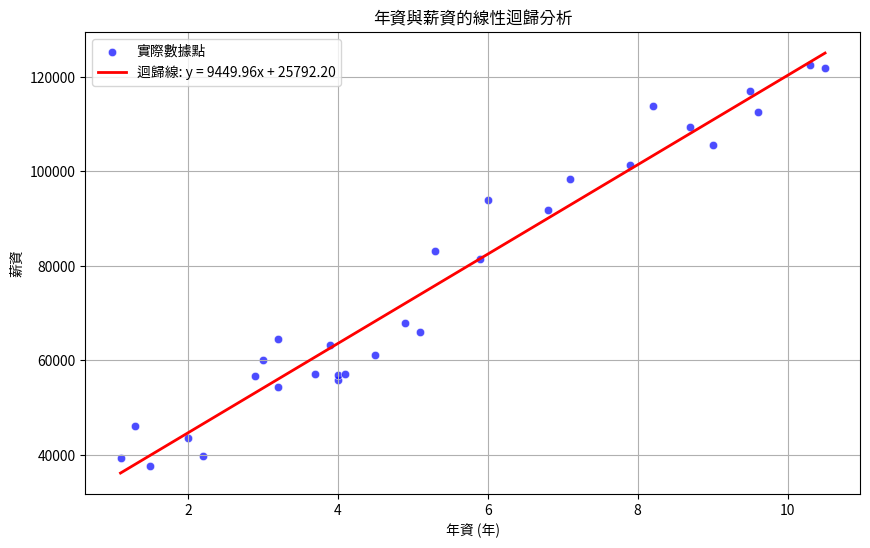

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib as mpl
from matplotlib.font_manager import fontManager


fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")

# 1. 準備數據 (沿用範例3的薪資數據)
file_path = 'Salary_Data.csv'

data = np.genfromtxt(file_path, delimiter=',', skip_header=1, filling_values=np.nan)
X_salary = data[:, 0].reshape(-1, 1) #說明1 # 年資 (特徵)，需要是 2D array
y_salary = data[:, 1]                # 薪資 (目標)


#使用 Scikit-learn 進行線性迴歸

model = LinearRegression()
model.fit(X_salary, y_salary)

# 獲取模型參數
slope = model.coef_[0]
intercept = model.intercept_
print(f"\n線性迴歸模型:")
print(f"斜率 (Coefficient): {slope:.2f}")
print(f"截距 (Intercept): {intercept:.2f}")

# 進行預測
X_test_points = np.array([[0], [5], [10], [12]]) # 假設一些新的年資點
y_pred = model.predict(X_test_points)
print("\n對新的年資點進行預測:")
for i in range(len(X_test_points)):
    print(f"年資 {X_test_points[i,0]} 年 -> 預測薪資: {y_pred[i]:.2f}")

#使用 Matplotlib 視覺化數據點和迴歸線
plt.figure(figsize=(10, 6))
plt.scatter(X_salary, y_salary, color='blue', alpha=0.7, label='實際數據點', edgecolors='w', linewidth=0.5)

# 繪製迴歸線
x_fit = np.linspace(X_salary.min(), X_salary.max(), 100).reshape(-1, 1)
y_fit = model.predict(x_fit)
plt.plot(x_fit, y_fit, color='red', linewidth=2, label=f'迴歸線: y = {slope:.2f}x + {intercept:.2f}')

plt.title('年資與薪資的線性迴歸分析')
plt.xlabel('年資 (年)')
plt.ylabel('薪資')
plt.legend()
plt.grid(True)
plt.show()


### ⬆︎說明1
`numpy` 的 `ndarray` 實體方法 `reshape(-1, 1)` 的意思是：將原本的陣列「重新調整形狀」為「有多列（行數自動計算）、每列只有一個欄位」的二維陣列。

- `-1` 代表「這個維度的大小由 numpy 自動推算」，只要與原本元素總數相符即可。
- `1` 則代表每列只有一個元素，也就是轉換成「一欄多列」的形狀。

### 例子說明
假設你有一個一維陣列：
```python
import numpy as np
a = np.array([1, 2, 3, 4, 5, 6])
```
原本 `a.shape` 為 `(6,)`，也就是一維、6 個元素。

執行 `a.reshape(-1, 1)` 後，結果會是：
```python
array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])
```
這時 `a.shape` 變成 `(6, 1)`，即 6 列 1 欄。

### 常見用途
- 將一維資料轉換成機器學習模型常用的「特徵向量」格式（n 筆資料、每筆 1 個特徵）。
- 在需要二維陣列輸入的情境下（如 sklearn），`reshape(-1, 1)` 非常常見。

### 小結
- `reshape(-1, 1)`：自動計算行數，轉為一欄的二維陣列。
- `reshape(1, -1)`：自動計算欄數，轉為一列的二維陣列。

